Model: Logistic Regression
Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

[[1543   64]
 [ 314   79]]
Model: Random Forest
Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

[[1550   57]
 [ 210  183]]
Model: Gradient Boosting
Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accura

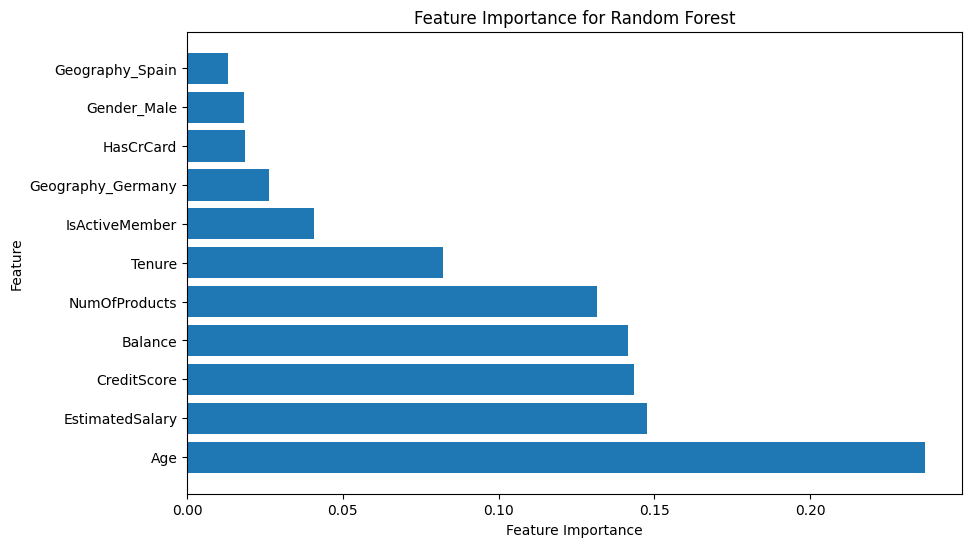

Logistic Regression Coefficients:
              Feature  Coefficient
1                 Age     0.754242
8   Geography_Germany     0.337658
3             Balance     0.160789
9     Geography_Spain     0.039323
7     EstimatedSalary     0.015749
5           HasCrCard    -0.010264
2              Tenure    -0.042680
4       NumOfProducts    -0.060611
0         CreditScore    -0.067687
10        Gender_Male    -0.264762
6      IsActiveMember    -0.533316


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


# Load the dataset
data = pd.read_csv("Churn_Modelling.csv")

# Data Preprocessing
# Encode categorical variables
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

# Split the data into features (X) and target (y)
X = data.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
y = data['Exited']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features (optional but recommended for some algorithms)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Selection and Training
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Model Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

# Feature Importance (for Random Forest and Gradient Boosting)
if 'Random Forest' in models or 'Gradient Boosting' in models:
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': models['Random Forest'].feature_importances_})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance for Random Forest')
    plt.show()

# You can also interpret Logistic Regression coefficients
if 'Logistic Regression' in models:
    logistic_coef = pd.DataFrame({'Feature': X.columns, 'Coefficient': models['Logistic Regression'].coef_[0]})
    logistic_coef = logistic_coef.sort_values(by='Coefficient', ascending=False)
    print("Logistic Regression Coefficients:")
    print(logistic_coef)

# Additional Interpretation (business-specific)
# You can further interpret the model results to understand the impact of features on churn.

# Model Deployment:
# Deploy the best-performing model on new data to make predictions for customer churn.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [ ]:
data=pd.read_csv("Churn_Modelling.csv")

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#check for any null values present in the data
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#to check the duplicates of the values present inside the data
data.duplicated().sum()

0

In [ ]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
#dropping the un necessary columns
column=['CustomerId','Surname','RowNumber']

In [ ]:
data.drop(column ,axis=1, inplace=True)

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
print(data["Geography"].unique())

['France' 'Spain' 'Germany']


In [ ]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

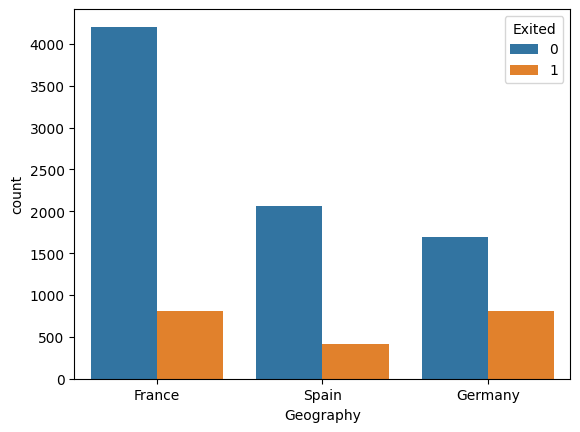

In [ ]:
sns.countplot(x='Geography',hue='Exited',data=data)
plt.show()


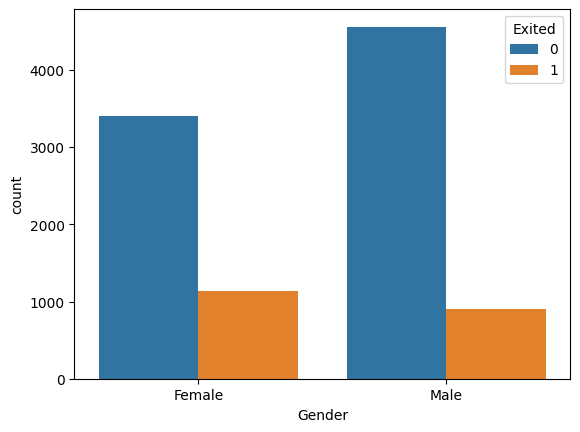

In [ ]:
sns.countplot(x='Gender',hue='Exited',data=data)
plt.show()

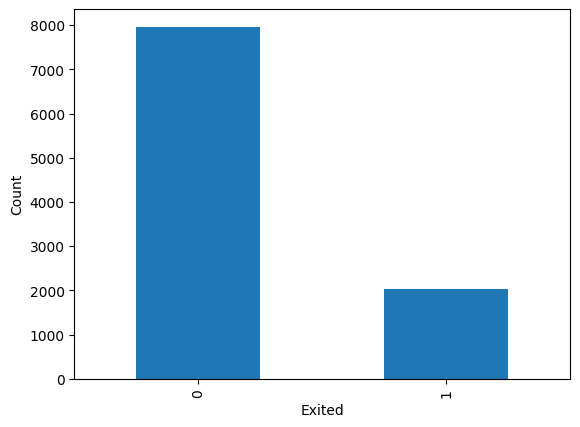

In [ ]:
data['Exited'].value_counts().plot(kind='bar')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

In [ ]:
dummy_data=pd.get_dummies(data,columns=['Gender','Geography'])

In [ ]:
dummy_data.head()

order = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Gender_Female',
       'Gender_Male', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Exited']
dummy_data = dummy_data[order]

In [ ]:
x=dummy_data.drop(columns='Exited')
y=dummy_data['Exited']

In [ ]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)


In [ ]:
print(x.shape)
y.shape

(10000, 13)


(10000,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, random_state=42)

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=50,random_state=42)


In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
rf_predict=rf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, rf_predict)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.87


In [ ]:
lg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
lg_predict=lg.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, lg_predict)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


In [ ]:
gb.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=50, random_state=42)

In [ ]:
gb_predict=gb.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, gb_predict)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.87


In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd

# data = {
#     'Model': ['randomforest', 'logistic', 'gradient'],
#     'LinePlot': [
#         [87, 88, 86, 90, 89],  # Line plot data for Model A
#         [81, 80, 83, 85, 82],  # Line plot data for Model B
#         [87, 88, 86, 90, 89]   # Line plot data for Model C
#     ]
# }

# df = pd.DataFrame(data)

# # Create a Matplotlib figure and axis
# plt.figure(figsize=(10, 6))
# ax = plt.gca()

# # Iterate over the data and create line plots for each model
# for i, row in df.iterrows():
#     model = row['Model']
#     line_plot_data = row['LinePlot']
#     x_values = range(1, len(line_plot_data) + 1)

#     plt.plot(x_values, line_plot_data, label=model, marker='o')

# # Customize the plot
# plt.title("Line Plots for Different Models")
# plt.xlabel("Data Point")
# plt.ylabel("Line Plot")
# plt.xticks(x_values)
# plt.legend(loc='best')
# plt.grid(True)

# # Show the plot
# plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_predict))
print(classification_report(y_test, lg_predict))
print(classification_report(y_test, gb_predict))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.77      0.46      0.57       584

    accuracy                           0.87      3000
   macro avg       0.82      0.71      0.75      3000
weighted avg       0.86      0.87      0.85      3000

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2416
           1       0.54      0.20      0.29       584

    accuracy                           0.81      3000
   macro avg       0.69      0.58      0.59      3000
weighted avg       0.78      0.81      0.77      3000

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.79      0.46      0.58       584

    accuracy                           0.87      3000
   macro avg       0.84      0.72      0.75      3000
weighted avg       0.86      0.87      0.86      3000



In [ ]:
import numpy as np
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

def taylor(x):
    """
    Calculate the logarithm of x using the Taylor series.
    """
    result = 0
    for n in range(1, 10):  # You can adjust the number of terms for accuracy
        term = ((-1) ** (n - 1)) * ((x - 1) ** n) / n
        result += term
    return result

class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * taylor(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)


#from DecisionTree import DecisionTree
import numpy as np
from collections import Counter

class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_feature=None):
        self.n_trees = n_trees
        self.max_depth=max_depth
        self.min_samples_split=min_samples_split
        self.n_features=n_feature
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth,
                            min_samples_split=self.min_samples_split,
                            n_features=self.n_features)
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions


from random import random
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
#from RandomForest import RandomForest

# Read your data
data = pd.read_csv('Churn_Modelling.csv')



# Split into features (X) and labels (y)
X = data.drop('Exited', axis=1).to_numpy()
y = data['Exited'].to_numpy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

clf = RandomForest(n_trees=25)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

acc =  accuracy(y_test, predictions)
print(acc)


from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
#NOTE THAT THE GRAPH HAS BEEN PLOTTED TO SHOW THE CLASS IMBALANCE
#YOU CAN ALSO PRINT RECALL AND PRECISION IN THE SAME WAY YOU DID FOR ACCURACY, THERE ARE READY MADE FORMULA


0.8545
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1588
           1       0.76      0.43      0.55       412

    accuracy                           0.85      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000

